In [2]:
#auto reload
%load_ext autoreload
%autoreload 2

In [3]:
import warcraftlogs
from warcraftlogs.constants import TOKEN_DIR

In [4]:
from warcraftlogs import WarcraftLogsClient

client = WarcraftLogsClient(token_dir=TOKEN_DIR)

In [5]:
query = """
query GetGameZones {
    gameData {
    expansions {
        name
        zones {
        id
        name
        }
    }
    }
}
"""

result = client.query_public_api(query)

In [6]:
result

{'errors': [{'message': 'Cannot query field "expansions" on type "GameData". Did you mean "factions"?',
   'extensions': {'category': 'graphql'},
   'locations': [{'line': 4, 'column': 5}]}]}

In [7]:
query = """
query GetAllGameZones {
  GameZone {
      id
      name
    }
  }
}
"""
result = client.query_public_api(query)
result


{'errors': [{'message': 'Syntax Error: Unexpected }',
   'extensions': {'category': 'graphql'},
   'locations': [{'line': 8, 'column': 1}]}]}

In [8]:
def get_data(query: str, **kwargs) -> dict:
    """
    Helper function to get data from the WarcraftLogs API.
    """
    data = client.query_public_api(query, **kwargs)
    return data

In [193]:
query="""query($code:String){
reportData{
  report(code:$code){
    startTime
    endTime
    fights {
      id
      difficulty
      name
      kill
      startTime
      endTime
      fightPercentage
    }
    playerDetails(fightIDs:1)
}
}}
"""
resp = client.query_public_api(query, {"code":"ZXxKHCtpn9hz2aAb"})

In [130]:
resp

{'data': {'reportData': {'report': {'startTime': 1743092625724,
    'endTime': 1743113207871,
    'fights': [{'id': 1,
      'difficulty': 10,
      'name': 'Cinderbrew Meadery',
      'kill': True,
      'startTime': 55502,
      'endTime': 2025196,
      'fightPercentage': 100},
     {'id': 2,
      'difficulty': 10,
      'name': 'Cinderbrew Meadery',
      'kill': False,
      'startTime': 2946175,
      'endTime': 4453906,
      'fightPercentage': 1.36},
     {'id': 3,
      'difficulty': 10,
      'name': 'Darkflame Cleft',
      'kill': False,
      'startTime': 5675069,
      'endTime': 5981456,
      'fightPercentage': 73.31},
     {'id': 4,
      'difficulty': None,
      'name': 'The Junkmaker',
      'kill': None,
      'startTime': 11298054,
      'endTime': 11303568,
      'fightPercentage': None},
     {'id': 5,
      'difficulty': 4,
      'name': 'Chrome King Gallywix',
      'kill': False,
      'startTime': 12033456,
      'endTime': 12061052,
      'fightPercentage'

In [113]:
(2025196-55502)/1000/60

32.82823333333333

In [109]:
import pandas as pd

pd.DataFrame(resp['data']['reportData']['report']['fights'])

,id,difficulty,name,kill,startTime,endTime,fightPercentage
0,1,10.0,Cinderbrew Meadery,True,55502,2025196,100.00
1,2,10.0,Cinderbrew Meadery,False,2946175,4453906,1.36
2,3,10.0,Darkflame Cleft,False,5675069,5981456,73.31
3,4,NaN,The Junkmaker,None,11298054,11303568,NaN
4,5,4.0,Chrome King Gallywix,False,12033456,12061052,99.96
5,6,4.0,Chrome King Gallywix,False,12211692,12289467,76.67
6,7,4.0,Chrome King Gallywix,False,12362843,12489351,66.46
7,8,4.0,Chrome King Gallywix,False,12591668,12938476,20.01
8,9,4.0,Chrome King Gallywix,False,13089368,13412200,29.41
9,10,4.0,Chrome King Gallywix,False,13513721,13610917,72.31


In [19]:
(4453906-2946175) 

def millis_to_minutes(millis):
    return millis / 1000 / 60

(2025196-555025) / 1000 / 60, (4453906-2946175) / 1000 / 60


(24.502850000000002, 25.12885)

In [191]:
# try analyzing fight Id = 1 
# playerid ret is 12
REPORT_ID = "ZXxKHCtpn9hz2aAb"
FIGHT_ID = 1
PLAYER_ID = 12

In [192]:
resp['data']['reportData']['report']

KeyError: 'report'

In [198]:
resp['data']['reportData']['report']['playerDetails']['data']['playerDetails']['tanks']

[{'name': 'Krapî',
  'id': 8,
  'guid': 214936496,
  'type': 'Druid',
  'server': 'Archimonde',
  'region': 'EU',
  'icon': 'Druid-Guardian',
  'specs': [{'spec': 'Guardian', 'count': 1}],
  'minItemLevel': 665,
  'maxItemLevel': 665,
  'potionUse': 0,
  'healthstoneUse': 0,
  'combatantInfo': []}]

In [27]:
def get_cooldown_usage_query(report_code, fight_id, player_id):
    query = """
    {
      reportData {
        report(code: "%s") {
          graph(
            fightIDs: [%d]
            dataType: Casts
            sourceID: %d
          )
        }
      }
    }
    """ % (report_code, fight_id, player_id)
    
    return query


def get_damage_done_query(report_code, fight_id, player_id=None):
    # If player_id is provided, filter to that specific player
    source_filter = f"sourceID: {player_id}" if player_id is not None else ""
    
    query = """
    {
      reportData {
        report(code: "%s") {
          graph(
            fightIDs: [%d]
            dataType: DamageDone
            %s
          )
        }
      }
    }
    """ % (report_code, fight_id, source_filter)
    
    return query

In [25]:
response = client.query_public_api(get_cooldown_usage_query(REPORT_ID, FIGHT_ID, PLAYER_ID))

In [28]:
dmg_events_resp = client.query_public_api(get_damage_done_query(REPORT_ID, FIGHT_ID, PLAYER_ID))

In [119]:
dmg_events_resp

{'data': {'reportData': {'report': {'graph': {'data': {'series': [{'name': 'Execution Sentence',
        'guid': 387113,
        'type': 2,
        'pointStart': 0,
        'pointInterval': 85758.94583333333,
        'total': 186860493,
        'data': [42098.3,
         51390.2,
         60201,
         62260.9,
         68361.7,
         78640,
         77411.3,
         88796.8,
         87368.3,
         87231.8,
         80616.8,
         87292.5,
         89730.4,
         100419.3,
         102952.5,
         96166.4,
         99452.5,
         95391.6,
         99104.2,
         104695,
         95175.3,
         79207.6,
         67959.1,
         55210.2,
         46576.2]},
       {'name': 'Divine Hammer',
        'guid': 198137,
        'type': 2,
        'pointStart': 0,
        'pointInterval': 85758.94583333333,
        'total': 352351135,
        'data': [114053.8,
         127341.6,
         165204.9,
         193702,
         204682.2,
         228362,
         221799

In [37]:
damage_events_flat = dmg_events_resp['data']['reportData']['report']['graph']['data']['series']

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter

def format_damage(x, pos):
    """Format damage values to be more readable"""
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.1f}K'
    else:
        return f'{x:.0f}'

def analyze_damage_data(damage_data):
    # Extract time interval in seconds for x-axis
    interval_ms = damage_data[0]['pointInterval']
    interval_sec = interval_ms / 1000
    
    # Create a DataFrame for easier manipulation
    abilities_df = pd.DataFrame()
    
    # Process each ability
    for ability in damage_data:
        if ability.get('name') == 'Total':
            total_data = ability['data']
            continue
        
        abilities_df[ability['name']] = ability['data']
    
    # Calculate time for x-axis (in minutes)
    fight_length_min = len(total_data) * interval_sec / 60
    time_points = np.linspace(0, fight_length_min, len(total_data))
    
    # Create visualizations
    plt.style.use('ggplot')
    
    # 1. Line chart of top 5 abilities over time
    plt.figure(figsize=(14, 7))
    
    # Get top 5 abilities by total damage
    top_abilities = abilities_df.sum().sort_values(ascending=False).head(5).index
    
    for ability in top_abilities:
        plt.plot(time_points, abilities_df[ability], linewidth=2, label=ability)
    
    plt.title('Top 5 Abilities Damage Over Time', fontsize=16)
    plt.xlabel('Fight Time (minutes)', fontsize=12)
    plt.ylabel('Damage', fontsize=12)
    plt.legend(fontsize=10)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_damage))
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # 2. Stacked area chart showing distribution of all abilities
    plt.figure(figsize=(14, 7))
    
    plt.stackplot(time_points, [abilities_df[ability] for ability in abilities_df.columns], 
                  labels=abilities_df.columns, alpha=0.7)
    
    plt.title('Ability Damage Distribution Throughout Fight', fontsize=16)
    plt.xlabel('Fight Time (minutes)', fontsize=12)
    plt.ylabel('Damage', fontsize=12)
    plt.legend(loc='upper right', fontsize=8)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_damage))
    plt.tight_layout()
    plt.show()
    
    # 3. Pie chart of total damage contribution
    plt.figure(figsize=(10, 10))
    
    ability_totals = abilities_df.sum().sort_values(ascending=False)
    ability_totals_pct = ability_totals / ability_totals.sum() * 100
    
    # Only display top 8 abilities individually, group the rest
    if len(ability_totals) > 8:
        top_abilities = ability_totals.head(8)
        other_total = ability_totals.iloc[8:].sum()
        
        top_abilities_pct = top_abilities / ability_totals.sum() * 100
        other_pct = other_total / ability_totals.sum() * 100
        
        labels = list(top_abilities.index) + ['Other']
        sizes = list(top_abilities_pct) + [other_pct]
    else:
        labels = ability_totals.index
        sizes = ability_totals_pct
    
    # Create explode array to highlight highest damage ability
    explode = [0.1] + [0] * (len(labels) - 1)
    
    plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', 
            shadow=True, startangle=90)
    plt.axis('equal')
    plt.title('Ability Damage Contribution', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # 4. Heatmap showing damage patterns over time
    plt.figure(figsize=(14, 8))
    
    # Normalize each ability to show relative usage patterns
    normalized_df = abilities_df.copy()
    for ability in normalized_df.columns:
        max_val = normalized_df[ability].max()
        if max_val > 0:
            normalized_df[ability] = normalized_df[ability] / max_val
    
    # Sort abilities by when they peak
    peak_times = {col: normalized_df[col].idxmax() for col in normalized_df.columns}
    sorted_abilities = sorted(normalized_df.columns, key=lambda x: peak_times[x])
    
    sns.heatmap(normalized_df[sorted_abilities].T, cmap='inferno', 
                xticklabels=np.round(time_points[::2], 1), 
                yticklabels=sorted_abilities)
    
    plt.title('Ability Usage Patterns Throughout Fight', fontsize=16)
    plt.xlabel('Fight Time (minutes)', fontsize=12)
    plt.ylabel('Ability', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # 5. Burst analysis - identify periods of highest damage
    plt.figure(figsize=(14, 6))
    
    # Calculate total damage at each time point
    total_series = pd.Series(total_data)
    
    # Calculate a moving average to smooth the data
    window_size = 3
    rolling_avg = total_series.rolling(window=window_size, center=True).mean()
    
    plt.plot(time_points, total_data, color='gray', alpha=0.6, label='Raw Damage')
    plt.plot(time_points, rolling_avg, color='red', linewidth=2.5, label=f'{window_size}-Point Moving Average')
    
    # Find and highlight burst phases (top 3 peaks)
    peaks = rolling_avg.nlargest(3).index
    for peak in peaks:
        plt.axvline(x=time_points[peak], color='green', linestyle='--', alpha=0.7)
        plt.text(time_points[peak], rolling_avg[peak] * 1.05, 
                 f'Burst at {time_points[peak]:.1f} min', 
                 horizontalalignment='center')
    
    plt.title('Damage Output and Major Burst Phases', fontsize=16)
    plt.xlabel('Fight Time (minutes)', fontsize=12)
    plt.ylabel('Total Damage', fontsize=12)
    plt.legend(fontsize=10)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_damage))
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Return key statistics
    top_abilities_stats = {}
    for ability in abilities_df.columns:
        ability_data = abilities_df[ability]
        top_abilities_stats[ability] = {
            'total_damage': ability_data.sum(),
            'max_damage': ability_data.max(),
            'avg_damage': ability_data.mean(),
            'damage_percentage': ability_data.sum() / abilities_df.sum().sum() * 100
        }
    
    return {
        'fight_length_min': fight_length_min,
        'ability_stats': top_abilities_stats,
        'peak_damage_time': time_points[total_series.idxmax()],
        'total_damage': total_series.sum()
    }

# Assuming damage_data is your list of dictionaries
# Example usage:
# stats = analyze_damage_data(damage_data)
# print(f"Fight length: {stats['fight_length_min']:.2f} minutes")
# print(f"Total damage: {stats['total_damage']:,}")
# print(f"Peak damage occurred at: {stats['peak_damage_time']:.2f} minutes")

In [45]:
REPORT_ID

'ZXxKHCtpn9hz2aAb'

In [116]:
from warcraftlogs.utils import parse_json_schema

In [118]:
print(parse_json_schema(response))

{
  "data": 
  {
    "reportData": 
    {
      "report": 
      {
        "graph": 
        {
          "data": 
          {
            "series": 
            [/* 33 items, showing schema only */
              {
                "name": str ('Divine Steed')
                "guid": int (190784)
                "type": int (2)
                "total": int (11)
                "data": 
                [
                  [
                    int (329660)
                    int (1000)
                  ]
                  [
                    int (391046)
                    int (1000)
                  ]
                  [
                    int (460880)
                    int (1000)
                  ]
                  [
                    int (724114)
                    int (1000)
                  ]
                  [
                    int (732809)
                    int (1000)
                  ]
                  ... (6 more items)
                ]
                "eve

In [115]:
damage_events_flat

[{'name': 'Execution Sentence',
  'guid': 387113,
  'type': 2,
  'pointStart': 0,
  'pointInterval': 85758.94583333333,
  'total': 186860493,
  'data': [42098.3,
   51390.2,
   60201,
   62260.9,
   68361.7,
   78640,
   77411.3,
   88796.8,
   87368.3,
   87231.8,
   80616.8,
   87292.5,
   89730.4,
   100419.3,
   102952.5,
   96166.4,
   99452.5,
   95391.6,
   99104.2,
   104695,
   95175.3,
   79207.6,
   67959.1,
   55210.2,
   46576.2]},
 {'name': 'Divine Hammer',
  'guid': 198137,
  'type': 2,
  'pointStart': 0,
  'pointInterval': 85758.94583333333,
  'total': 352351135,
  'data': [114053.8,
   127341.6,
   165204.9,
   193702,
   204682.2,
   228362,
   221799.4,
   187775.5,
   160676.9,
   178462.6,
   195897.2,
   206812.9,
   191269.5,
   180519.6,
   175908.3,
   160493.5,
   157861,
   154481.8,
   144270.4,
   124230.7,
   100911.3,
   76707.8,
   54387.9,
   36640.7,
   30271.8]},
 {'name': "Highlord's Judgment",
  'guid': 383921,
  'type': 2,
  'pointStart': 0,
  'poi

In [63]:
(pd.DataFrame(stats['ability_stats']).T.\
    sort_values('total_damage', ascending=False)).\
    round(2)

,total_damage,max_damage,avg_damage,damage_percentage
Empyrean Hammer,23202747.6,1495884.7,928109.90,31.02
Divine Storm,14424107.6,946652.2,576964.30,19.29
Hammer of Light,9157962.2,534262.2,366318.49,12.24
Wake of Ashes,6129348.8,342583.5,245173.95,8.20
Divine Hammer,3772725.3,228362.0,150909.01,5.04
Judgment,3363368.8,176626.0,134534.75,4.50
Blade of Justice,2918339.5,159468.0,116733.58,3.90
Final Verdict,2811504.4,155856.5,112460.18,3.76
Crusading Strikes,2592844.4,154520.7,103713.78,3.47
Execution Sentence,2003709.9,104695.0,80148.40,2.68


In [86]:
damage_data_df = pd.DataFrame(damage_events_flat)

def format_damage_single(x):
    """Format damage values to be more readable"""
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.1f}K'
    else:
        return f'{x:.0f}'
    
damage_data_df['total_formatted'] = damage_data_df['total'].apply(format_damage_single)

In [94]:
damage_data_df['total'].sum()/(32+40/60)/60

np.float64(3544646.4025510205)

In [101]:
damage_events_flat

[{'name': 'Execution Sentence',
  'guid': 387113,
  'type': 2,
  'pointStart': 0,
  'pointInterval': 85758.94583333333,
  'total': 186860493,
  'data': [42098.3,
   51390.2,
   60201,
   62260.9,
   68361.7,
   78640,
   77411.3,
   88796.8,
   87368.3,
   87231.8,
   80616.8,
   87292.5,
   89730.4,
   100419.3,
   102952.5,
   96166.4,
   99452.5,
   95391.6,
   99104.2,
   104695,
   95175.3,
   79207.6,
   67959.1,
   55210.2,
   46576.2]},
 {'name': 'Divine Hammer',
  'guid': 198137,
  'type': 2,
  'pointStart': 0,
  'pointInterval': 85758.94583333333,
  'total': 352351135,
  'data': [114053.8,
   127341.6,
   165204.9,
   193702,
   204682.2,
   228362,
   221799.4,
   187775.5,
   160676.9,
   178462.6,
   195897.2,
   206812.9,
   191269.5,
   180519.6,
   175908.3,
   160493.5,
   157861,
   154481.8,
   144270.4,
   124230.7,
   100911.3,
   76707.8,
   54387.9,
   36640.7,
   30271.8]},
 {'name': "Highlord's Judgment",
  'guid': 383921,
  'type': 2,
  'pointStart': 0,
  'poi

In [89]:
damage_data_df.\
    sort_values('total', ascending=False).\
    drop(columns=['data', 'id'])

,name,guid,type,pointStart,pointInterval,total,total_formatted
3,Empyrean Hammer,431398.0,2,0,85758.945833,2.177592e+09,2177.6M
12,Divine Storm,53385.0,2,0,85758.945833,1.319160e+09,1319.2M
9,Hammer of Light,427453.0,2,0,85758.945833,8.387591e+08,838.8M
11,Wake of Ashes,255937.0,6,0,85758.945833,5.723674e+08,572.4M
1,Divine Hammer,198137.0,2,0,85758.945833,3.523511e+08,352.4M
6,Judgment,20271.0,2,0,85758.945833,3.084676e+08,308.5M
8,Blade of Justice,184575.0,6,0,85758.945833,2.716379e+08,271.6M
13,Final Verdict,383328.0,2,0,85758.945833,2.681922e+08,268.2M
7,Crusading Strikes,408385.0,1,0,85758.945833,2.377392e+08,237.7M
0,Execution Sentence,387113.0,2,0,85758.945833,1.868605e+08,186.9M


,name,guid,type,pointStart,pointInterval,total,data,id,total_formatted
0,Execution Sentence,387113.0,2,0,85758.945833,1.868605e+08,"[42098.3, 51390.2, 60201, 62260.9, 68361.7, 78...",NaN,186.9M
1,Divine Hammer,198137.0,2,0,85758.945833,3.523511e+08,"[114053.8, 127341.6, 165204.9, 193702, 204682....",NaN,352.4M
2,Highlord's Judgment,383921.0,2,0,85758.945833,1.366897e+08,"[36205.9, 43469.6, 53086.5, 61058.8, 69858.7, ...",NaN,136.7M
3,Empyrean Hammer,431398.0,2,0,85758.945833,2.177592e+09,"[699468.5, 812157.5, 1020938.4, 1217425, 13393...",NaN,2177.6M
4,Hammer of Wrath,24275.0,2,0,85758.945833,3.751338e+07,"[8984.5, 10588.7, 12547.6, 13618.3, 14114.3, 1...",NaN,37.5M
5,Consecration,26573.0,2,0,85758.945833,1.709839e+08,"[56059.7, 62332, 77935.2, 89023.6, 101491, 111...",NaN,171.0M
6,Judgment,20271.0,2,0,85758.945833,3.084676e+08,"[71705.7, 86735.9, 109622.7, 125559.4, 146730....",NaN,308.5M
7,Crusading Strikes,408385.0,1,0,85758.945833,2.377392e+08,"[54137.8, 68368, 92557.9, 111821.2, 124219.8, ...",NaN,237.7M
8,Blade of Justice,184575.0,6,0,85758.945833,2.716379e+08,"[71838, 83163.8, 108104.2, 121042.2, 133988.3,...",NaN,271.6M
9,Hammer of Light,427453.0,2,0,85758.945833,8.387591e+08,"[211235.9, 261816.2, 323929.6, 388550.2, 43491...",NaN,838.8M


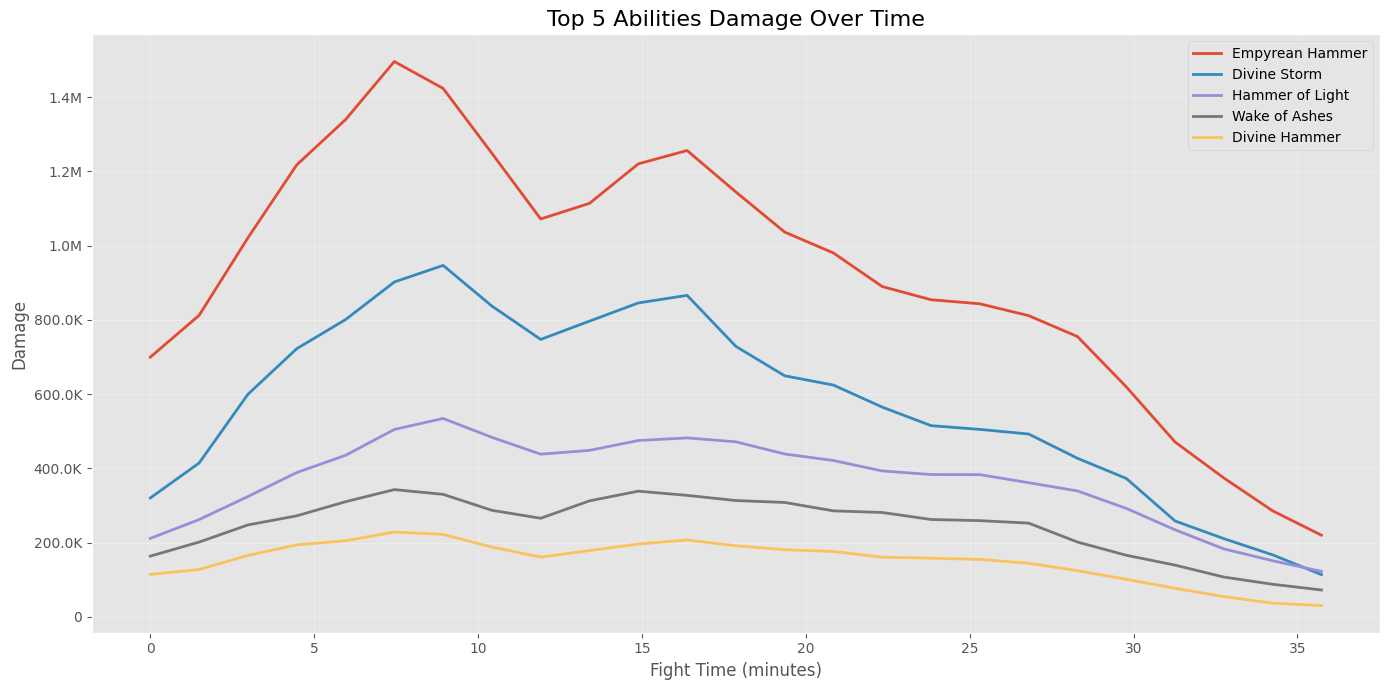

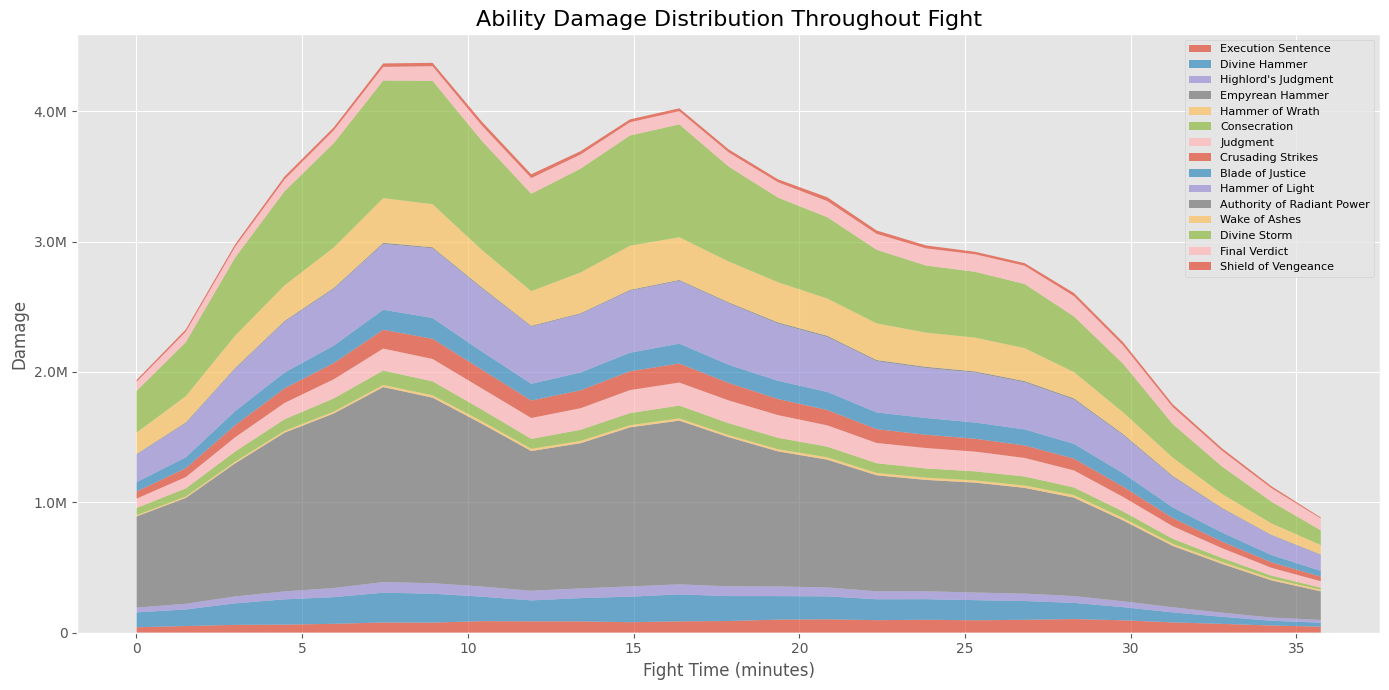

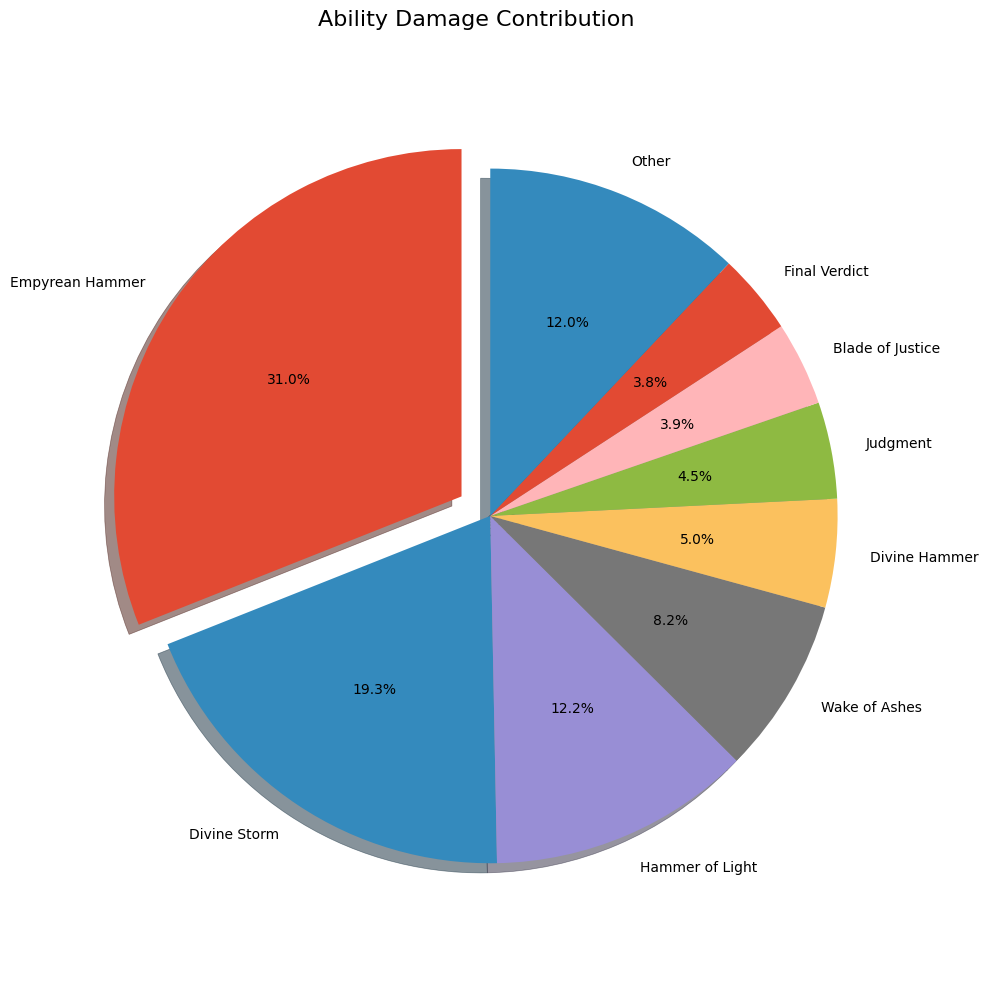

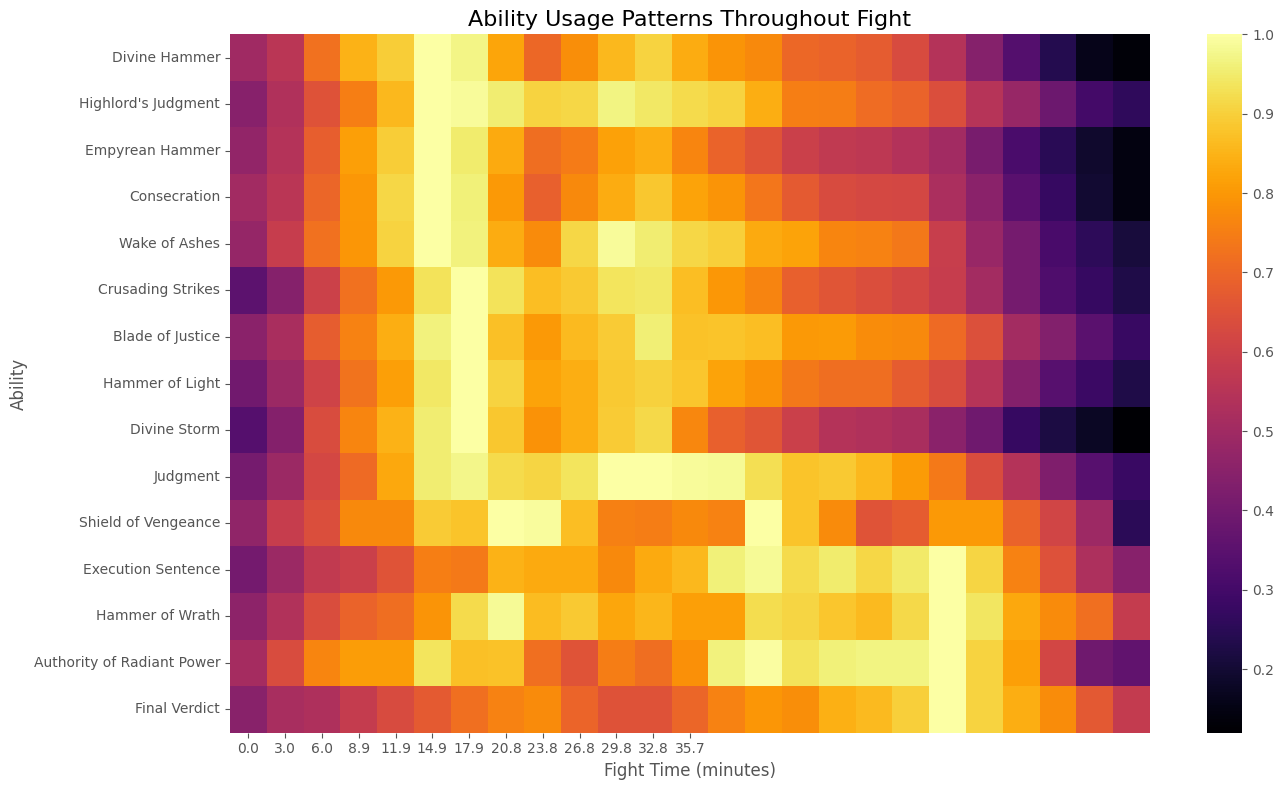

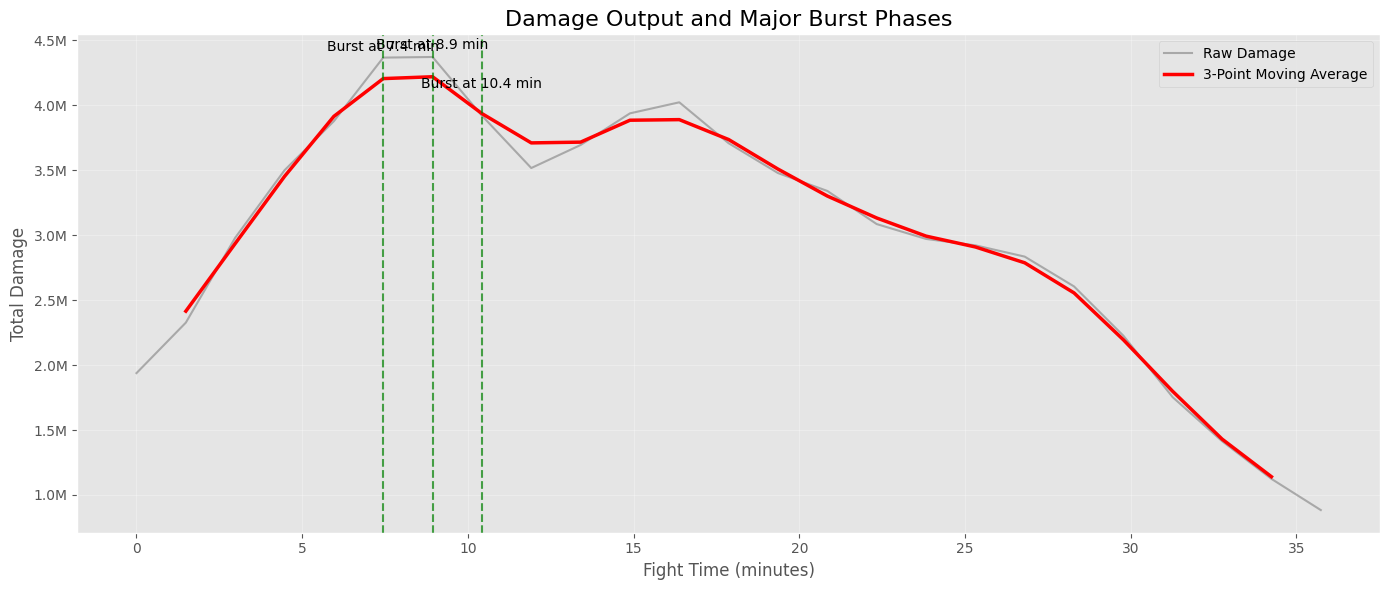

In [42]:
stats = analyze_damage_data(damage_events_flat)

In [124]:
def generate_player_fight_query(report_code, fight_id, player_id):
    """
    Generate a GraphQL query to get comprehensive information about a player during a specific fight.
    
    Args:
        report_code (str): The unique code for the WarcraftLogs report
        fight_id (int): The ID of the specific fight within the report
        player_id (int): The ID of the player to get information about
        
    Returns:
        tuple: (query_string, variables_dict) - The GraphQL query as a string and the variables dictionary
    """
    query = """
    query GetPlayerFightData($reportCode: String!, $fightID: Int!, $playerID: Int!) {
      report(code: $reportCode) {
        code
        title
        startTime
        
        # Get the specific fight data
        fights(fightIDs: [$fightID]) {
          id
          name
          difficulty
          startTime
          endTime
          kill
          encounterID
          size
          friendlyPlayers
          bossPercentage
          fightPercentage
          lastPhase
        }
        
        # Get player details including gear, talents, etc.
        playerDetails(
          fightIDs: [$fightID],
          includeCombatantInfo: true
        )
        
        # Get player combat data from the table view
        table(
          fightIDs: [$fightID],
          dataType: Summary,
          sourceID: $playerID
        )
        
        # Get damage done by the player
        table(
          fightIDs: [$fightID],
          dataType: DamageDone,
          sourceID: $playerID,
          viewBy: Ability
        )
        
        # Get healing done by the player
        table(
          fightIDs: [$fightID],
          dataType: Healing,
          sourceID: $playerID,
          viewBy: Ability
        )
        
        # Get damage taken by the player
        table(
          fightIDs: [$fightID],
          dataType: DamageTaken,
          targetID: $playerID,
          viewBy: Source
        )
        
        # Get casts by the player
        table(
          fightIDs: [$fightID],
          dataType: Casts,
          sourceID: $playerID
        )
        
        # Get buffs on the player
        table(
          fightIDs: [$fightID],
          dataType: Buffs,
          targetID: $playerID
        )
        
        # Get debuffs on the player
        table(
          fightIDs: [$fightID],
          dataType: Debuffs,
          targetID: $playerID
        )
        
        # Get player death events
        table(
          fightIDs: [$fightID],
          dataType: Deaths,
          sourceID: $playerID
        )
        
        # Get all events for the player (as source or target)
        events(
          fightIDs: [$fightID],
          sourceID: $playerID,
          limit: 10000
        )
        
        # Get talent information for the player (for Dragonflight+)
        fights(fightIDs: [$fightID]) {
          talentImportCode(actorID: $playerID)
        }
        
        # Get the master data which includes information about abilities and actors
        masterData {
          actors(type: "Player") {
            id
            name
            server
            type
            subType
            gameID
            icon
          }
          abilities {
            gameID
            name
            type
            icon
          }
        }
      }
    }
    """
    
    variables = {
        "reportCode": report_code,
        "fightID": fight_id,
        "playerID": player_id
    }
    
    return query, variables

# Example usage:
# query_string, variables = generate_player_fight_query("abcd1234", 12, 34)
# 
# # Use with a GraphQL client like gql
# from gql import Client, gql
# from gql.transport.requests import RequestsHTTPTransport
# 
# transport = RequestsHTTPTransport(
#     url='https://www.warcraftlogs.com/api/v2/client',
#     headers={'Authorization': f'Bearer YOUR_API_TOKEN'}
# )
# 
# client = Client(transport=transport)
# result = client.execute(gql(query_string), variable_values=variables)

In [125]:
query, variables = generate_player_fight_query(REPORT_ID, FIGHT_ID, PLAYER_ID)

In [128]:
resp = client.query_public_api(query, variables)

HTTPError: 500 Server Error: Internal Server Error for url: https://www.warcraftlogs.com/api/v2/client

In [137]:
def generate_prot_warrior_reports_query(start_time=None, end_time=None, limit=100):
    """
    Generate a GraphQL query to find reports with Protection Warriors.
    
    Args:
        start_time (int, optional): Unix timestamp for start date
        end_time (int, optional): Unix timestamp for end date
        limit (int, optional): Max number of reports to return
        
    Returns:
        tuple: (query_string, variables_dict)
    """
    query = """
    query GetProtWarriorReports($startTime: Float, $endTime: Float, $limit: Int!) {
      reportData {
        reports(startTime: $startTime, endTime: $endTime, limit: $limit) {
          data {
            code
            title
            startTime
            endTime
            zone {
              id
              name
            }
            masterData {
              actors(type: "Player", subType: "Warrior") {
                id
                name
                subType
              }
            }
          }
        }
      }
    }
    """
    
    variables = {
        "startTime": start_time,
        "endTime": end_time,
        "limit": limit
    }
    
    return query, variables

In [149]:
# 
start_time = "03/26/2025"
end_time = "03/27/2025"

start_time_epoch = int(pd.Timestamp(start_time).timestamp()*1000)
end_time_epoch = int(pd.Timestamp(end_time).timestamp()*1000)
print(start_time_epoch, end_time_epoch)

query, variables = generate_prot_warrior_reports_query(start_time_epoch, end_time_epoch, limit=10)

1742947200000 1743033600000


In [150]:
resp = client.query_public_api(query, variables)

In [151]:
resp

{'data': {'reportData': {'reports': {'data': [{'code': 'mY6dnTrRAbGLwk3t',
      'title': 'Mythic+ Season 2',
      'startTime': 1743006322155,
      'endTime': 1743200355389,
      'zone': {'id': 43, 'name': 'Mythic+ Season 2'},
      'masterData': {'actors': [{'id': 294,
         'name': 'Kuilqol',
         'subType': 'Warrior'},
        {'id': 296, 'name': 'Moggi', 'subType': 'Warrior'},
        {'id': 394, 'name': 'Malok', 'subType': 'Warrior'},
        {'id': 547, 'name': 'Bricep', 'subType': 'Warrior'},
        {'id': 889, 'name': 'Xingjian', 'subType': 'Warrior'},
        {'id': 1198, 'name': 'Michona', 'subType': 'Warrior'},
        {'id': 1216, 'name': 'Bigrignick', 'subType': 'Warrior'},
        {'id': 1450, 'name': 'Thakasw', 'subType': 'Warrior'},
        {'id': 1561, 'name': 'Tuskalott', 'subType': 'Warrior'},
        {'id': 1636, 'name': 'Maxcleavage', 'subType': 'Warrior'},
        {'id': 1644, 'name': 'Tilwar', 'subType': 'Warrior'},
        {'id': 1655, 'name': 'Pannin

In [ ]:
def generate_prot_warrior_reports_query(start_time=None, end_time=None, limit=100, min_key_level=10):
    """
    Generate a GraphQL query to find reports with Protection Warriors in Mythic+ dungeons.
    
    Args:
        start_time (int, optional): Unix timestamp for start date (milliseconds)
        end_time (int, optional): Unix timestamp for end date (milliseconds)
        limit (int, optional): Max number of reports to return
        min_key_level (int, optional): Minimum keystone level to include
        
    Returns:
        tuple: (query_string, variables_dict)
    """
    query = """
    query GetProtWarriorReports($startTime: Float, $endTime: Float, $limit: Int!, $zoneID: Int) {
      reportData {
        reports(startTime: $startTime, endTime: $endTime, limit: $limit, zoneID: $zoneID) {
          data {
            code
            title
            startTime
            endTime
            zone {
              id
              name
            }
            fights(difficulty: 10) {
              id
              name
              difficulty
              keystoneLevel
              kill
              friendlyPlayers
              startTime
              endTime
            }
            playerDetails(
              fightIDs: [$fightID],
              includeCombatantInfo: true
            )
            masterData {
              actors(type: "Player", subType: "Warrior") {
                id
                name
                subType
              }
            }
          }
          total
        }
      }
    }
    """
    
    variables = {
        "startTime": start_time,
        "endTime": end_time,
        "limit": limit,
        "zoneID": 43  # WoW Mythic+ Dungeons zone ID - you may need to update this based on current expansion
    }
    
    return query, variables

In [187]:
query, variables = generate_prot_warrior_reports_query(start_time_epoch, end_time_epoch, limit=10)

In [188]:
resp = client.query_public_api(query, variables)
resp

{'data': {'reportData': {'reports': {'data': [{'code': 'fh9pYnAjLJm4xVC6',
      'title': 'Mythic+ Season 2',
      'startTime': 1743022007056,
      'endTime': 1743202898845,
      'zone': {'id': 43, 'name': 'Mythic+ Season 2'},
      'fights': [{'id': 1,
        'name': 'Cinderbrew Meadery',
        'difficulty': 10,
        'keystoneLevel': 11,
        'kill': False,
        'friendlyPlayers': [10, 14, 62, 9, 60, 61, 8, 15],
        'startTime': 286585,
        'endTime': 2249494},
       {'id': 2,
        'name': 'Cinderbrew Meadery',
        'difficulty': 10,
        'keystoneLevel': 10,
        'kill': True,
        'friendlyPlayers': [62, 9, 60, 61, 63],
        'startTime': 2249562,
        'endTime': 4240303},
       {'id': 3,
        'name': 'Darkflame Cleft',
        'difficulty': 10,
        'keystoneLevel': 10,
        'kill': True,
        'friendlyPlayers': [9, 83, 82, 84, 81],
        'startTime': 4967006,
        'endTime': 6573829},
       {'id': 35,
        'name': '

In [237]:
query = """
query GetDungeonRankings($zoneID: Int!) {
  worldData {
    zone(id: $zoneID) {
      name
      encounters {
        id
        name
        characterRankings(
          className: "Warrior",
          specName: "Protection",
          bracket: 10,
          includeCombatantInfo: true,
          leaderboard:LogsOnly
        )
      }
    }
  }
}
"""

variables = {
    "zoneID": 43,  # Replace with the actual dungeon zone ID
    "metric": "dps",  # Can be "dps", "hps", "playerscore", etc.
    "className": "Warrior",  # Optional
    "specName": "Protection"          # Optional
}

In [238]:
resp = client.query_public_api(query, variables)

In [247]:
resp['data']['worldData']['zone']['encounters'][0]['characterRankings']['rankings'][0]

{'name': 'Andychron',
 'class': 'Warrior',
 'spec': 'Protection',
 'amount': -199999665,
 'hardModeLevel': 10,
 'duration': 1171127,
 'startTime': 1742978648972,
 'report': {'code': 'xLNaZjW81JdpGfyD',
  'fightID': 5,
  'startTime': 1742970222189},
 'guild': {'id': 296858, 'name': 'Competence Optional', 'faction': 1},
 'server': {'id': 350, 'name': 'Twisting Nether', 'region': 'EU'},
 'bracketData': 10,
 'faction': 0,
 'affixes': [9, 10, 160],
 'medal': 'gold',
 'score': 335,
 'leaderboard': 0,
 'talents': [{'talentID': 112110, 'points': 1},
  {'talentID': 112112, 'points': 1},
  {'talentID': 112116, 'points': 1},
  {'talentID': 112149, 'points': 1},
  {'talentID': 112150, 'points': 1},
  {'talentID': 112151, 'points': 1},
  {'talentID': 112152, 'points': 1},
  {'talentID': 112153, 'points': 1},
  {'talentID': 112155, 'points': 1},
  {'talentID': 112156, 'points': 1},
  {'talentID': 112157, 'points': 1},
  {'talentID': 112158, 'points': 1},
  {'talentID': 112159, 'points': 1},
  {'tale

In [ ]:
### fighto only query

